# Resumen de métricas de PyOD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

Creamos csv general de etiquetado:

In [2]:
pyod = pd.read_csv('PyOD/Resultados/HBOS_completo.csv')
pyod = pyod.drop('Y_pred', axis=1)

Leemos la predicción de cada método:

In [3]:
hbos = pd.read_csv('PyOD/Resultados/HBOS_completo.csv',usecols=['Y_pred'])
iforest = pd.read_csv('PyOD/Resultados/IForest_completo.csv',usecols=['Y_pred'])
knn = pd.read_csv('PyOD/Resultados/KNN_completo.csv',usecols=['Y_pred'])
loda = pd.read_csv('PyOD/Resultados/LODA_completo.csv',usecols=['Y_pred'])
mad = pd.read_csv('PyOD/Resultados/MAD_completo.csv',usecols=['Y_pred'])
mcd = pd.read_csv('PyOD/Resultados/MCD_completo.csv',usecols=['Y_pred'])

La unimos al csv general:

In [4]:
pyod['HBOS'] = hbos['Y_pred']
pyod['IForest'] = iforest['Y_pred']
pyod['KNN'] = knn['Y_pred']
pyod['LODA'] = loda['Y_pred']
pyod['MAD'] = mad['Y_pred']
pyod['MCD'] = mcd['Y_pred']

In [5]:
pyod = pyod.set_index('fecha')

In [6]:
pyod.head()

,Negro,Congelado,Hum,Anomalia,HBOS,IForest,KNN,LODA,MAD,MCD
fecha,,,,,,,,,,
2021-05-05 10:31:00,0,0,0,0,0,0,0,0,0,0
2021-03-04 02:06:00,0,0,0,0,0,0,0,0,0,0
2021-07-06 21:41:00,0,0,0,0,0,0,0,0,0,0
2021-05-01 21:58:00,0,0,0,0,0,0,0,0,0,0
2021-04-03 19:13:00,0,0,0,0,0,0,0,0,0,0


## Métricas generales:

In [7]:
anomalias = ['Anomalia','Negro','Congelado','Hum']
metodos = ['HBOS','IForest','KNN','LODA','MAD','MCD']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

metricas_generales = pd.DataFrame(index=metodos,columns=metricas)
for metodo in metodos:
    metricas_generales.loc[metodo,metricas[0]] = roc_auc_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[1]] = accuracy_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[2]] = precision_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[3]] = cohen_kappa_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[4]] = recall_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[5]] = recall_score(pyod['Anomalia'], pyod[metodo], pos_label=0)
metricas_generales

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS,0.61892,0.875366,0.227216,0.19994,0.320423,0.917418
IForest,0.72485,0.902897,0.366127,0.377521,0.517606,0.932093
KNN,0.547181,0.856342,0.13247,0.079206,0.187324,0.907039
LODA,0.585794,0.866114,0.182788,0.143714,0.259507,0.912082
MAD,0.948249,0.98244,0.852048,0.869887,0.908451,0.988046
MCD,0.549841,0.856144,0.135288,0.083194,0.19331,0.906372


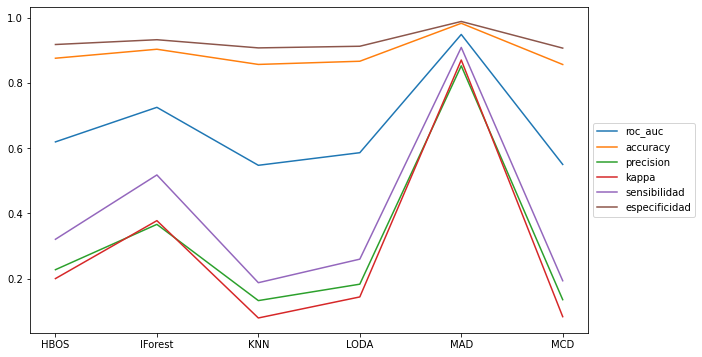

In [8]:
metricas_generales.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

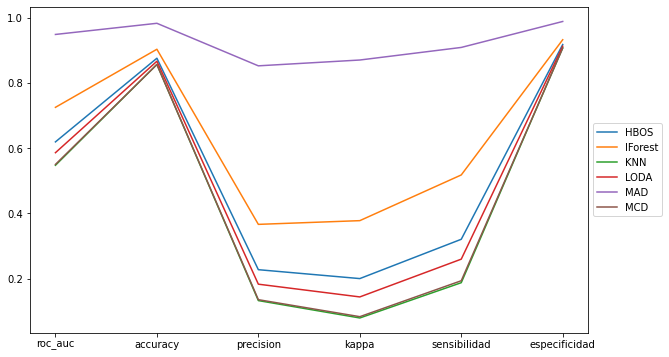

In [9]:
metricas_generales.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

## Sensibilidad por tipo de anomalía

In [10]:
sensibilidades = pd.DataFrame(index=metodos, columns=anomalias)

for metodo in metodos:
    for anomalia in anomalias:
        sensibilidades.loc[metodo,anomalia] = recall_score(pyod[anomalia], pyod[metodo])

sensibilidades

,Anomalia,Negro,Congelado,Hum
HBOS,0.320423,0.272241,0.259173,0.890909
IForest,0.517606,0.508508,0.486339,0.807273
KNN,0.187324,0.122022,0.162763,0.407273
LODA,0.259507,0.187652,0.188525,0.912727
MAD,0.908451,1.0,0.898517,1.0
MCD,0.19331,0.111327,0.161202,0.483636


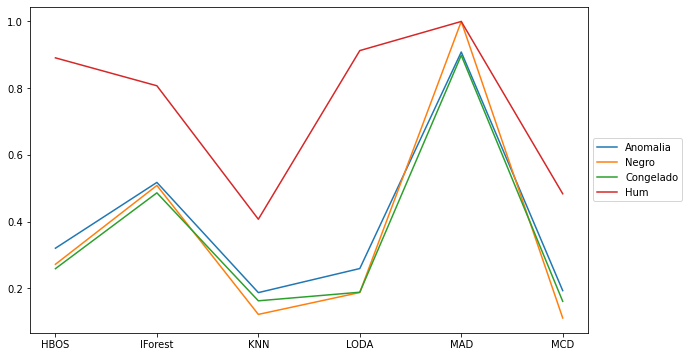

In [11]:
sensibilidades.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

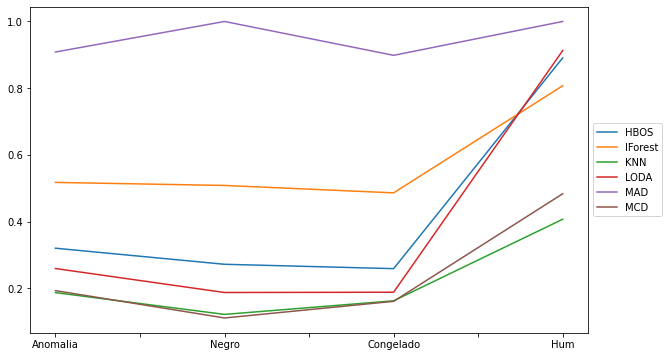

In [12]:
sensibilidades.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))